<img src='https://cdn.radiofrance.fr/s3/cruiser-production/2018/10/bfca8681-cbe1-4396-b725-b3bf51e6e68e/870x489_titanic_uppa_photoshot_maxnewsfr040608.jpg' width='800'>

# Data Description

>* PassengerId: type should be integers 
>* Survived: Survived or Not 
>* Pclass: Class of Travel
>* Name: Name of Passenger
>* Sex: Gender
>* Age: Age of Passengers
>* SibSp: Number of Sibling/Spouse aboard
>* Parch: Number of Parent/Child aboard
>* Ticket: Ticket number
>* Fare: Fare for ticket
>* Cabin: Cabin Number
>* Embarked: The port in which a passenger has embarked. C - Cherbourg, S - Southampton, Q = Queenstown

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

import os
os.listdir('../input')

['gender_submission.csv', 'test.csv', 'train.csv']

In [2]:
df = pd.read_csv("../input/train.csv")
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
332,333,0,1,"Graham, Mr. George Edward",male,38.0,0,1,PC 17582,153.4625,C91,S
191,192,0,2,"Carbines, Mr. William",male,19.0,0,0,28424,13.0000,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
null_sum = pd.DataFrame(df.isnull().sum(), columns=['Sum'])
null_percent = pd.DataFrame((df.isnull().sum()/df.shape[0])*100, columns=['Percent'])
total = pd.concat([null_sum, null_percent], axis=1)
total.sort_values(['Sum', 'Percent'], ascending=False)

,Sum,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


>* Cabin and Age columns has most null values

In [5]:
''' Droping Cabin column and filling Age column null values with mean '''
df.drop('Cabin', axis=1, inplace=True)
df["Age"] = df["Age"].fillna(value=df.Age.mean())

In [6]:
def pie_plot(cnts, colors, title):
    labels = cnts.index
    values = cnts.values
    
    trace = go.Pie(labels=labels,
                   values=values,
                   title=title,
                   textinfo='value',
                   hoverinfo='label+percent',
                   hole=.4,
                   textposition='inside',
                   marker=dict(colors=colors,
                               line=dict(color='#000000', width=2)
                              )
                  )
    layout = go.Layout(hovermode='closest')
    fig = go.Figure(data=[trace], layout=layout)
    return py.iplot(fig)

In [7]:
pie_plot(df['Embarked'].value_counts(), colors=['yellow','orange', 'cyan'], title='Embarked')

>* Most passengers got on board from Southampton

In [8]:
''' Filling null values with most common value '''
df["Embarked"] = df["Embarked"].fillna("S")

# How many people Survived?

In [9]:
pie_plot(df['Survived'].value_counts(), colors=['gold','cyan'], title='Survived?')

>* 38.4% of people Survived

# Who Survived more Male or Female?

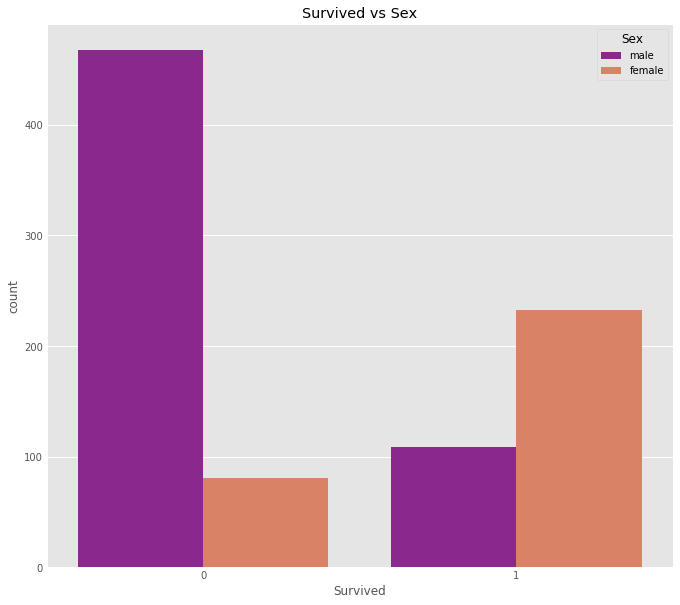

In [10]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
sns.countplot(df['Survived'], hue=df['Sex'], palette='plasma')
plt.title("Survived vs Sex")
plt.show()

>* Females Survived the most

# Which class survived the most?

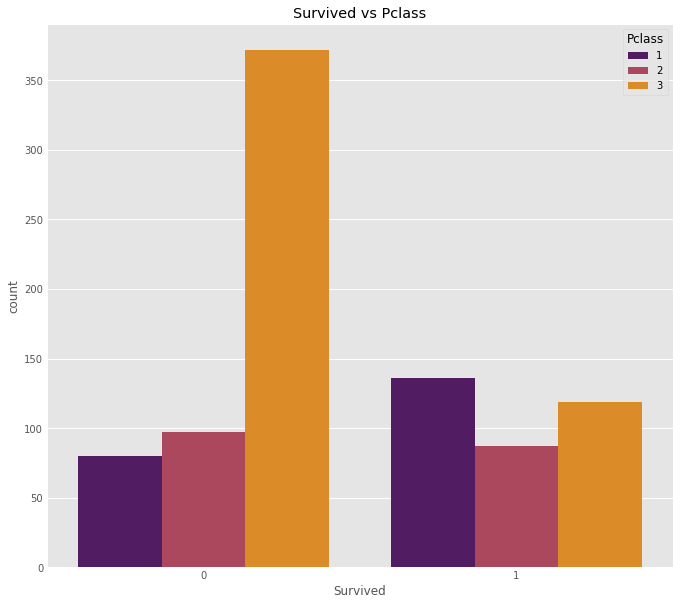

In [11]:
plt.figure(figsize=(10,10))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='inferno')
plt.title('Survived vs Pclass')
plt.show()

>* First Class Passengers Survived the most

# Exploring relations

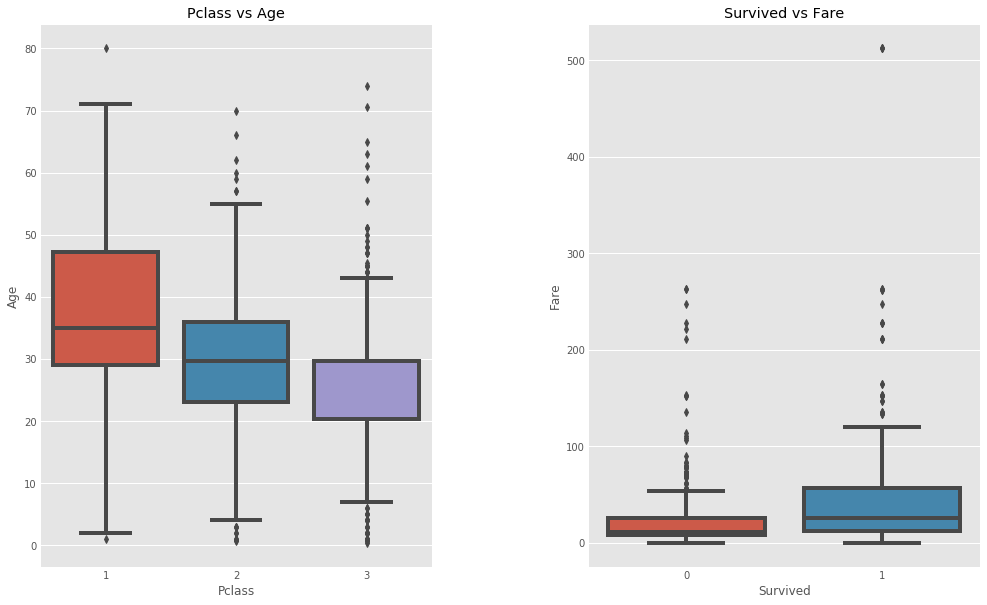

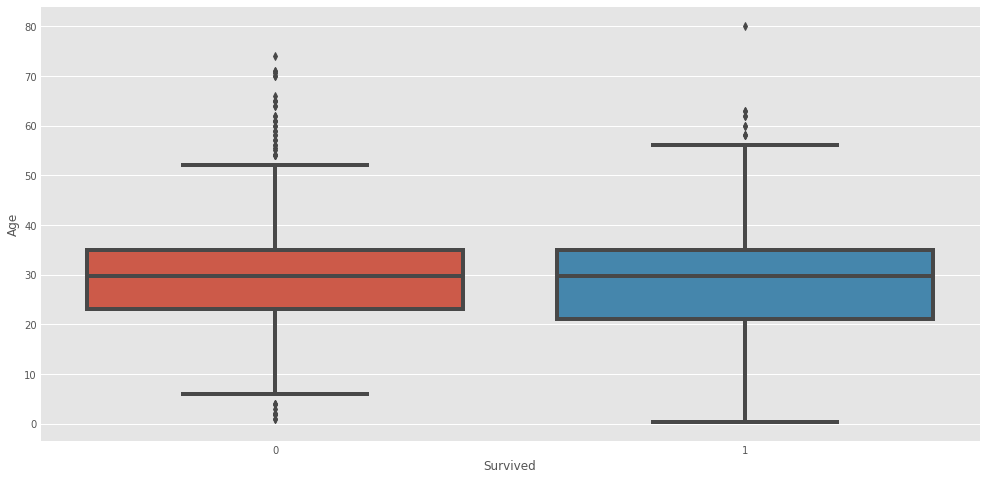

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Pclass vs Age')

plt.subplot(1,2,2)
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title('Survived vs Fare')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(x='Survived', y='Age', data=df);

>* Higher Age passengers are mostly in First Class
>* As First Class Passengers have survived the most there is a direct relation with Fare
>* Higher Age passengers survived the most which is because most higher age passengers travelled in first class and most first class passengers Survived

In [13]:
pd.DataFrame(df.corr()['Survived'].sort_values(ascending=False))

,Survived
Survived,1.000000
Fare,0.257307
Parch,0.081629
PassengerId,-0.005007
SibSp,-0.035322
Age,-0.069809
Pclass,-0.338481


>* Fare, Parch are quite correlated with survived

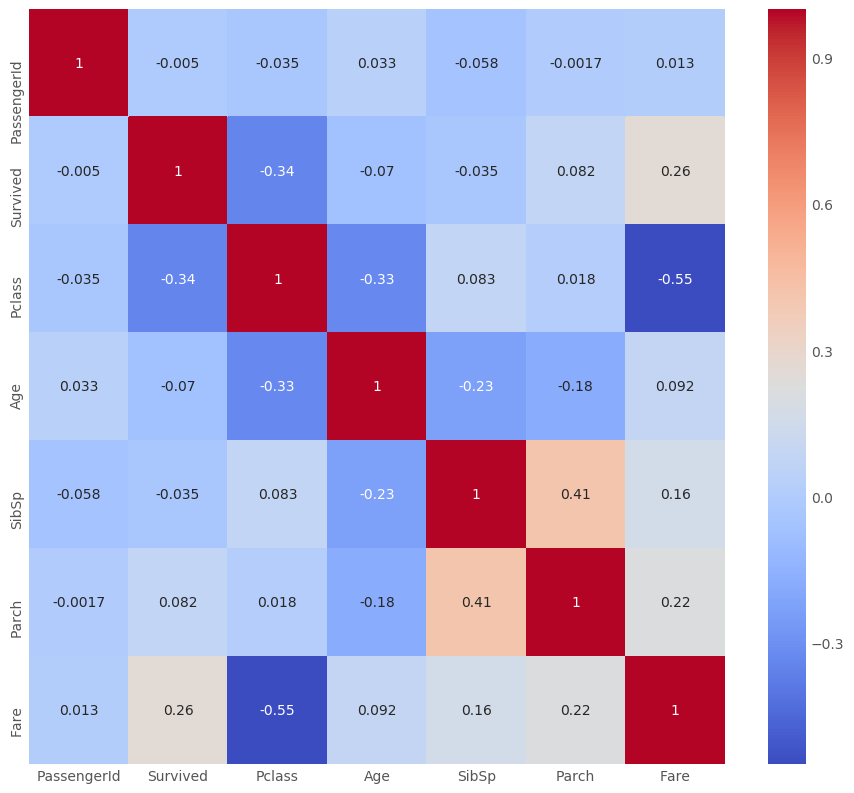

In [14]:
plt.figure(figsize=(10,10), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

# Feature Engineering

In [15]:
''' Extracting prefix from names '''
df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.", expand=False)
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [16]:
''' Correcting spelling mistakes in prefixes and naming rarely used prefixes with Rare'''
df["Title"] = df["Title"].replace(["Don", "Rev", "Dr", "Major", "Lady", 
                                         "Sir", "Col", "Capt", "Countess", "Jonkheer"], "Rare")

df["Title"] = df["Title"].replace("Mlle", "Mrs")
df["Title"] = df["Title"].replace("Ms", "Miss")
df["Title"] = df["Title"].replace("Mme", "Mrs")

df[["Title", "Survived"]].groupby("Title", as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.699454
2,Mr,0.156673
3,Mrs,0.796875
4,Rare,0.347826


In [17]:
'''Mapping male as 1 and Female as 0'''
df["Sex"] = df["Sex"].map({"male": 1, "female":0})

In [18]:
'''Bining the values of Fare'''
df["Fareband"] = pd.qcut(df["Fare"], 4)
df[["Fareband", "Survived"]].groupby("Fareband", as_index=False).mean().sort_values(by="Fareband", ascending=True)

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [19]:
df.loc[df["Fare"] <= 7.91, "Fare"] = 0
df.loc[(df["Fare"] > 7.91) & (df["Fare"] <= 14.454), "Fare"] = 1
df.loc[(df["Fare"] > 14.454) & (df["Fare"] <= 31.0), "Fare"] = 2
df.loc[df["Fare"] > 31.0, "Fare"] = 3
df["Fare"] = df["Fare"].astype("int")

In [20]:
'''Bining the values of Age'''
df["Ageband"] = pd.cut(df["Age"], 4)
df[["Ageband", "Survived"]].groupby("Ageband", as_index=False).mean().sort_values(by="Ageband", ascending=True)

,Ageband,Survived
0,"(0.34, 20.315]",0.458101
1,"(20.315, 40.21]",0.364769
2,"(40.21, 60.105]",0.390625
3,"(60.105, 80.0]",0.227273


In [21]:
df.loc[df["Age"] <= 20.315, "Age"] = 0
df.loc[(df["Age"] > 20.315) & (df["Age"] <= 40.21), "Age"] = 1
df.loc[(df["Age"] > 40.21) & (df["Age"] <= 60.105), "Age"] = 2
df.loc[(df["Age"] > 60.105) & (df["Age"] <= 80.0), "Age"] = 3
df["Age"] = df["Age"].astype("int")

In [22]:
'''Creating isAlone Feature to see if the person is alone or not'''
df["isAlone"] = df["SibSp"] + df["Parch"] + 1
df["isAlone"].loc[df["isAlone"] > 1] = 0
df["isAlone"].loc[df["isAlone"] == 1] = 1

# Who Survived?

In [23]:
def horizontal_bar_chart(cnt_srs, color):
    trace = go.Bar(
        y = cnt_srs.index[::-1],
        x = cnt_srs.values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace

cnt_srs = df.groupby('Title')["Survived"].agg(['count', 'mean'])
cnt_srs.columns = ["count", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace_1 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(50, 171, 96, 0.6)')
trace_2 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(50, 171, 96, 0.6)')


cnt_srs = df.groupby('Age')["Survived"].agg(['count', 'mean'])
cnt_srs.columns = ["count", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace_3 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(71, 58, 131, 0.6)')
trace_4 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(71, 58, 131, 0.6)')


cnt_srs = df.groupby('Fare')["Survived"].agg(['count', 'mean'])
cnt_srs.columns = ["count", "mean"]
cnt_srs = cnt_srs.sort_values(by="count", ascending=False)
trace_5 = horizontal_bar_chart(cnt_srs["count"].head(10), 'rgba(246, 78, 139, 0.6)')
trace_6 = horizontal_bar_chart(cnt_srs["mean"].head(10), 'rgba(246, 78, 139, 0.6)')


fig = tools.make_subplots(3, 2, vertical_spacing=0.04,
                         subplot_titles=["Count-Title", "Mean-Title",
                                         "Count-Ageband", "Mean-Ageband",
                                         "Count-Fareband", "Mean-Fareband"])

fig.append_trace(trace_1, 1, 1)
fig.append_trace(trace_2, 1, 2)
fig.append_trace(trace_3, 2, 1)
fig.append_trace(trace_4, 2, 2)
fig.append_trace(trace_5, 3, 1)
fig.append_trace(trace_6, 3, 2)

fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233, 233, 233)', title="Survived by Columns")
py.iplot(fig, filename="survived-by-cols")

>* Count and Mean Survived by title, ageband, fareband

# Imbalanced ?

In [24]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

>* target column is imbalanced
>* We have handled this later with resampling

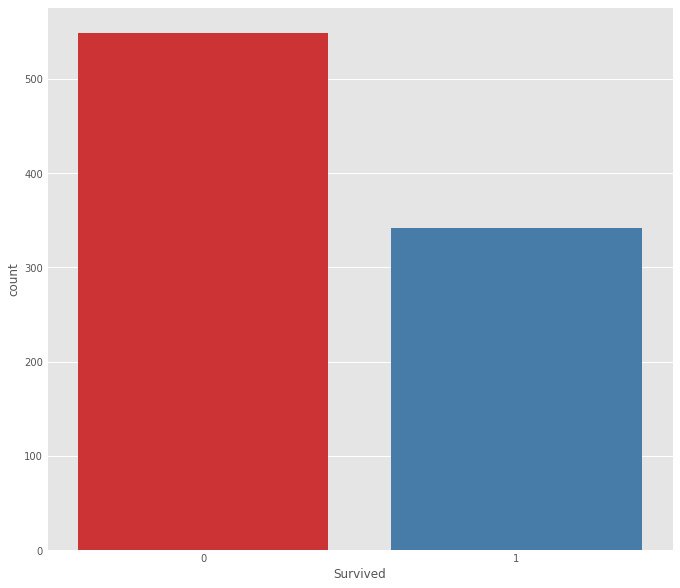

In [25]:
plt.figure(figsize=(10,10))
sns.countplot(df['Survived'], palette='Set1');

# Preprocessing

In [26]:
df.drop(['PassengerId', 'Ageband', 'Fareband', 'Name', 'Ticket'], axis=1, inplace=True)

In [27]:
'''One Hot Encoding'''
objects = df.select_dtypes(include=['object'])
objects = pd.get_dummies(objects, drop_first=True)
df.drop(df.select_dtypes(include=['object']), axis=1, inplace=True)
df = pd.concat([df, objects], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,isAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,3,1,1,1,0,0,0,0,1,0,1,0,0
1,1,1,0,1,1,0,3,0,0,0,0,0,1,0
2,1,3,0,1,0,0,1,1,0,1,1,0,0,0
3,1,1,0,1,1,0,3,0,0,1,0,0,1,0
4,0,3,1,1,0,0,1,1,0,1,0,1,0,0


In [28]:
X = df.drop('Survived', axis=1)
y = df["Survived"]

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn import svm
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.

Using TensorFlow backend.


In [30]:
df_train, df_test, Y_train, Y_test = train_test_split(X, y , test_size=0.2, random_state=101)

# Resampling

<img src = "https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png" width='800'>

* Undersampling
>* Some samples of majority class are removed till it becomes equal to the samples of minority class

* Oversampling
>* Copies of monority class samples are made till it becomes equal to the samples of majority class

In [31]:
'''OverSampling'''
X = pd.concat([df_train, Y_train], axis=1)

not_survived = X[X.Survived==0]
survived = X[X.Survived==1]

over_sampled = resample(survived, 
                        replace=True, # Samples with replacement
                        n_samples=len(not_survived), # Number of samples
                        random_state=27)

over_sampled = pd.concat([not_survived, over_sampled])

over_sampled.Survived.value_counts()

1    450
0    450
Name: Survived, dtype: int64

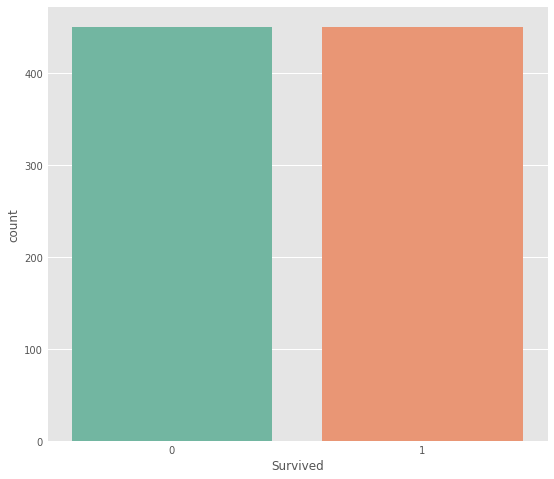

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(over_sampled['Survived'], palette='Set2');

In [33]:
over_train = over_sampled.drop('Survived', axis=1)
y_over_train = over_sampled['Survived']

lg = LogisticRegression()
lg.fit(over_train, y_over_train)
lg_pred = lg.predict(df_test)
print('OverSampling Accuracy:', metrics.accuracy_score(Y_test, lg_pred))

OverSampling Accuracy: 0.8156424581005587


In [34]:
'''UnderSampling'''

under_sampled = resample(not_survived,
                         replace=False, # sample without replacement
                         n_samples=len(survived), # Number of Samples
                         random_state=27
                        )
under_sampled = pd.concat([survived, under_sampled])

under_sampled.Survived.value_counts()

1    262
0    262
Name: Survived, dtype: int64

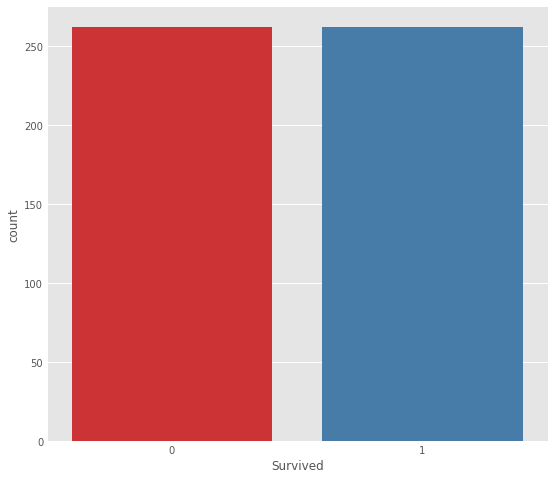

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(under_sampled['Survived'], palette='Set1');

In [36]:
X_train = under_sampled.drop('Survived', axis=1)
y_train = under_sampled['Survived']

lg = LogisticRegression()
lg.fit(X_train, y_train)
lg_pred = lg.predict(df_test)
print('UnderSampling Accuracy:', metrics.accuracy_score(Y_test, lg_pred))

UnderSampling Accuracy: 0.7877094972067039


# SMOTE

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

<img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png" width='800'>

In [37]:
X = df.drop('Survived', axis=1)
y = df["Survived"]

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm , test_size=0.2, random_state=101)

In [39]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)
print('SMOTE Accuracy:', metrics.accuracy_score(y_test, lg_pred))

SMOTE Accuracy: 0.8045454545454546


* OverSampling gives the best result so we will be using oversampled data

# Logistic Regression

In [40]:
x_train = over_train
y_train = y_over_train
x_test = df_test
y_test = Y_test

In [41]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

lr = LogisticRegression()

gs_Log = GridSearchCV(lr, param_grid=params, cv=folds, n_jobs=-1, scoring='accuracy', return_train_score=True, 
                      verbose=1)

gs_Log.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    2.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.5s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [42]:
gs_Log.best_params_

{'C': 1}

In [43]:
gs_results = pd.DataFrame(gs_Log.cv_results_)
gs_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009131,0.001933,0.002645,0.000454,0.01,{'C': 0.01},0.705556,0.772222,0.722222,0.777778,...,0.742222,0.028241,6,0.769444,0.737500,0.741667,0.720833,0.738889,0.741667,0.015689
1,0.006929,0.000276,0.001801,0.000130,0.1,{'C': 0.1},0.750000,0.794444,0.733333,0.800000,...,0.767778,0.025676,5,0.802778,0.779167,0.786111,0.766667,0.786111,0.784167,0.011706
2,0.007726,0.000137,0.002005,0.000278,1,{'C': 1},0.761111,0.811111,0.794444,0.822222,...,0.797778,0.020668,1,0.813889,0.800000,0.802778,0.793056,0.794444,0.800833,0.007433
3,0.009122,0.000344,0.001945,0.000150,10,{'C': 10},0.761111,0.794444,0.794444,0.822222,...,0.797778,0.021545,1,0.812500,0.802778,0.802778,0.797222,0.805556,0.804167,0.004969
4,0.011055,0.000690,0.001987,0.000062,100,{'C': 100},0.761111,0.794444,0.800000,0.805556,...,0.795556,0.018725,3,0.809722,0.801389,0.800000,0.793056,0.806944,0.802222,0.005800
5,0.011826,0.000540,0.002099,0.000195,1000,{'C': 1000},0.761111,0.794444,0.794444,0.805556,...,0.794444,0.018592,4,0.809722,0.801389,0.801389,0.790278,0.806944,0.801944,0.006667


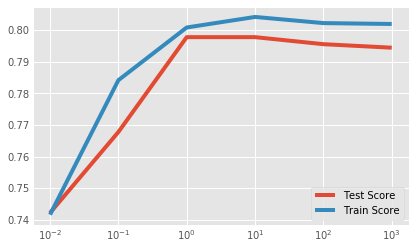

In [44]:
plt.plot(gs_results['param_C'], gs_results['mean_test_score'])
plt.plot(gs_results['param_C'], gs_results['mean_train_score'])
plt.legend(["Test Score", "Train Score"], loc="lower right")
plt.xscale("log")

# SVM

In [45]:
svc = SVC()

'''Finding right params'''
params = {"C": [0.01, 0.1, 1, 10, 100],
          "gamma": [1e-1, 1e-2, 1e-3, 1e-4],
          "kernel" : ["linear", "rbf", "sigmoid", "poly"]}

svc_gs = GridSearchCV(svc, param_grid=params, cv=folds, scoring="accuracy", n_jobs=-1, return_train_score=True, 
                      verbose=1)

svc_gs.fit(x_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    9.9s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=1)

In [46]:
svc_gs.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [47]:
svc_results = pd.DataFrame(svc_gs.cv_results_)
svc_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.020423,0.002266,0.004556,0.000133,0.01,0.1,linear,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}",0.733333,0.777778,...,0.766667,0.032961,36,0.779167,0.773611,0.770833,0.766667,0.772222,0.772500,0.004064
1,0.045951,0.002225,0.010431,0.000076,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.666667,0.733333,...,0.731111,0.034890,47,0.744444,0.731944,0.733333,0.730556,0.736111,0.735278,0.004938
2,0.056917,0.001290,0.014168,0.000280,0.01,0.1,sigmoid,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'sigmoid'}",0.650000,0.677778,...,0.693333,0.031309,63,0.695833,0.680556,0.713889,0.704167,0.712500,0.701389,0.012266
3,0.021621,0.000709,0.005918,0.001020,0.01,0.1,poly,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'poly'}",0.683333,0.794444,...,0.782222,0.052868,24,0.793056,0.790278,0.781944,0.787500,0.786111,0.787778,0.003768
4,0.017939,0.001207,0.004830,0.000285,0.01,0.01,linear,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}",0.733333,0.777778,...,0.766667,0.032961,36,0.779167,0.773611,0.770833,0.766667,0.772222,0.772500,0.004064


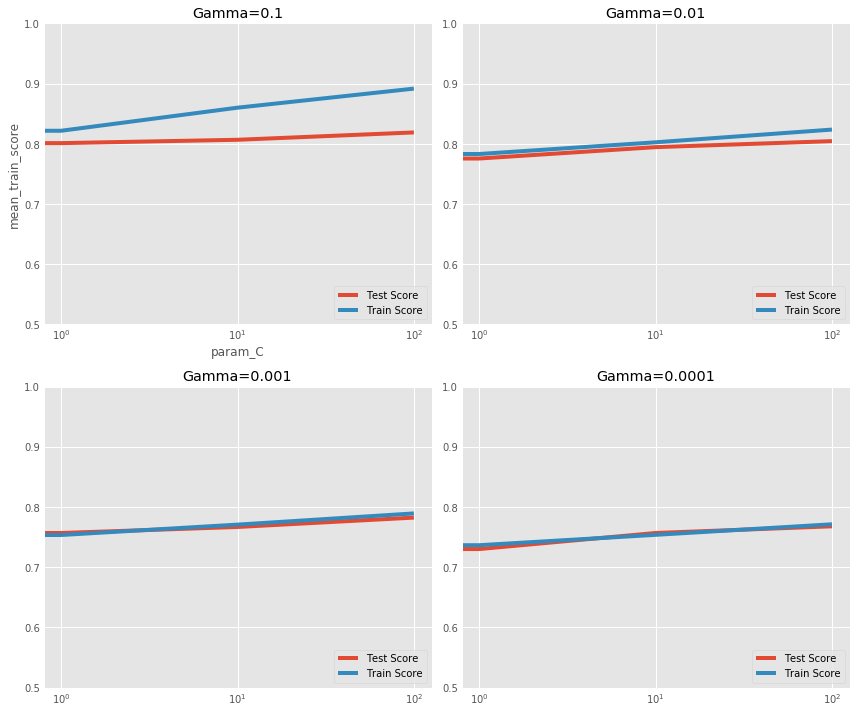

In [48]:
svc_results['param_C'] = svc_results['param_C'].astype('int')

fig, ax = plt.subplots(2,2, figsize=(12,10))
gamma_01 = svc_results.loc[(svc_results['param_gamma'] == 0.1) & (svc_results['param_kernel'] == 'rbf')]
sns.lineplot(gamma_01['param_C'], gamma_01['mean_test_score'], ax=ax[0,0])
sns.lineplot(gamma_01['param_C'], gamma_01['mean_train_score'], ax=ax[0,0])
ax[0,0].set_title("Gamma=0.1")
ax[0,0].set_ylim([0.50, 1.0])
ax[0,0].set_xscale("log")
ax[0,0].legend(["Test Score", "Train Score"], loc="lower right")


gamma_01 = svc_results.loc[(svc_results['param_gamma'] == 0.01) & (svc_results['param_kernel'] == 'rbf')]
ax[0,1].plot(gamma_01['param_C'], gamma_01['mean_test_score'])
ax[0,1].plot(gamma_01['param_C'], gamma_01['mean_train_score'])
ax[0,1].set_title("Gamma=0.01")
ax[0,1].set_ylim([0.50, 1.0])
ax[0,1].set_xscale("log")
ax[0,1].legend(["Test Score", "Train Score"], loc="lower right")


gamma_01 = svc_results.loc[(svc_results['param_gamma'] == 0.001) & (svc_results['param_kernel'] == 'rbf')]
ax[1,0].plot(gamma_01['param_C'], gamma_01['mean_test_score'])
ax[1,0].plot(gamma_01['param_C'], gamma_01['mean_train_score'])
ax[1,0].set_title("Gamma=0.001")
ax[1,0].set_ylim([0.50, 1.0])
ax[1,0].set_xscale("log")
ax[1,0].legend(["Test Score", "Train Score"], loc="lower right")


gamma_01 = svc_results.loc[(svc_results['param_gamma'] == 0.0001) & (svc_results['param_kernel'] == 'rbf')]
ax[1,1].plot(gamma_01['param_C'], gamma_01['mean_test_score'])
ax[1,1].plot(gamma_01['param_C'], gamma_01['mean_train_score'])
ax[1,1].set_title("Gamma=0.0001")
ax[1,1].set_ylim([0.50, 1.0])
ax[1,1].set_xscale("log")
ax[1,1].legend(["Test Score", "Train Score"], loc="lower right")

plt.tight_layout()

In [49]:
final_svc = SVC(C=1, gamma=0.1, kernel="rbf")
final_svc.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [50]:
'''Feature Importance'''
perm = PermutationImportance(final_svc, random_state=1).fit(x_train, y_train)
eli5.show_weights(perm, feature_names=x_train.columns.tolist())

Weight,Feature
0.1356 ± 0.0088,Title_Mr
0.0418 ± 0.0072,SibSp
0.0249 ± 0.0064,Pclass
0.0238 ± 0.0048,Fare
0.0062 ± 0.0067,Parch
0.0038 ± 0.0036,Title_Rare
0.0031 ± 0.0022,Age
0.0022 ± 0.0031,isAlone
0.0004 ± 0.0027,Embarked_S
-0.0004 ± 0.0011,Title_Mrs


# Different Algorithms

In [51]:
kfold = KFold(5, random_state=10)
accuracy = []

classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(C=1),
        KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),
        RandomForestClassifier(n_estimators=100)]

for model in models:
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    accuracy.append(cv_result.mean())
new_models_df = pd.DataFrame({"CV Mean": accuracy}, index=classifiers)
new_models_df

,CV Mean
Linear Svm,0.821518
Radial Svm,0.828266
Logistic Regression,0.820413
KNN,0.810370
Decision Tree,0.794633
Naive Bayes,0.793466
Random Forest,0.808110


>* Radial SVM gives the best score

# Features Impact

In [52]:
import shap 
rf = RandomForestClassifier(n_estimators=1000, max_depth=2)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

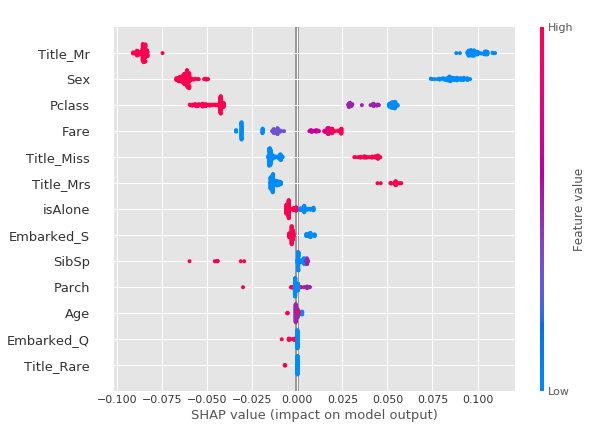

In [53]:
exp = shap.TreeExplainer(rf, x_train)
shap_values = exp.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test)

In [54]:
shap.initjs()
shap.force_plot(exp.expected_value[0], shap_values[0], x_test)

# Reference:-

>* https://www.kaggle.com/shahules/tackling-class-imbalance

# UpVote if this was helpful
>* I would be updating it more 